# Your first convolutional neural network

# imports

In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

Using TensorFlow backend.


# data

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [6]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

W0405 17:53:50.839913 140364703463232 deprecation_wrapper.py:119] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0405 17:53:50.848084 140364703463232 deprecation_wrapper.py:119] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0405 17:53:50.850259 140364703463232 deprecation_wrapper.py:119] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

W0405 17:53:50.906231 140364703463232 deprecation_wrapper.py:119] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0405 17:53:50.906654 140364703463232 deprecation_wrapper.py:119] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0405 17:53:50.968498 140364703463232 deprecation_wrapper.py:119] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0405 17:53:51.303492 140364703463232 deprecation.py:506] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout

In [17]:
# [kernel width * kernel height * channels in the previous layer + bias(1)] * output_channels
(3 * 3 * 3 + 1) * 32

896

In [19]:
# BatchNorm: scale, shift, moving averages stored for prediction time
32 * 4

128

In [20]:
# conv2d_4 (Conv2D) stride = 2 -> height, width halved
(3 * 3 * 32 + 1) * 32

9248

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0         
__________

# train

In [10]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

W0405 17:53:51.341967 140364703463232 deprecation_wrapper.py:119] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [11]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

W0405 17:53:51.412840 140364703463232 deprecation.py:323] From /home/mor/.conda/envs/generative_dl/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 83s 2ms/step - loss: 1.5566 - acc: 0.4568 - val_loss: 1.2102 - val_acc: 0.5646
Epoch 2/10
50000/50000 [==============================] - 85s 2ms/step - loss: 1.1492 - acc: 0.5961 - val_loss: 1.0397 - val_acc: 0.6298
Epoch 3/10
50000/50000 [==============================] - 86s 2ms/step - loss: 1.0011 - acc: 0.6519 - val_loss: 0.9674 - val_acc: 0.6604
Epoch 4/10
50000/50000 [==============================] - 82s 2ms/step - loss: 0.9145 - acc: 0.6808 - val_loss: 0.9105 - val_acc: 0.6819
Epoch 5/10
50000/50000 [==============================] - 88s 2ms/step - loss: 0.8569 - acc: 0.7023 - val_loss: 0.9434 - val_acc: 0.6632
Epoch 6/10
50000/50000 [==============================] - 88s 2ms/step - loss: 0.8112 - acc: 0.7160 - val_loss: 1.0021 - val_acc: 0.6493
Epoch 7/10
50000/50000 [==============================] - 90s 2ms/step - loss: 0.7602 - acc: 0.7355 - val_loss: 1.1429 - val_acc

In [12]:
model.layers[6].get_weights()

[]

# analysis

In [13]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 1s 127us/step


[0.9864260792732239, 0.6708000004291534]

In [14]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

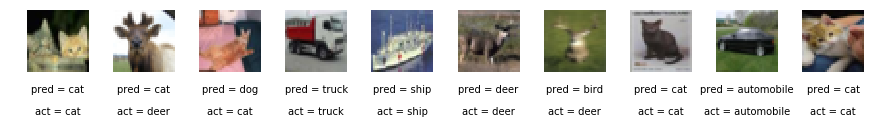

In [15]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
